In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import ipaddress
from aimlsse_api.client import GroundDataClient, SatelliteDataClient

In [2]:
ground_data_client = GroundDataClient(ipaddress.ip_address('127.0.0.1'), 8000)

In [3]:
ground_data = ground_data_client.queryMeasurements(datetime.datetime(2022, 11, 10), datetime.datetime(2022, 12, 20))
print(ground_data)

                        geometry        date   latitude   longitude  \
0      POINT (20.90670 24.81500)  2022-11-11  24.815003   20.906701   
1      POINT (73.90808 41.35024)  2022-11-11  41.350239   73.908079   
2     POINT (-40.10522 53.51293)  2022-11-11  53.512933  -40.105223   
3     POINT (-8.50139 -10.19678)  2022-11-11 -10.196778   -8.501391   
4     POINT (-33.01267 11.42238)  2022-11-11  11.422382  -33.012673   
..                           ...         ...        ...         ...   
475  POINT (162.62570 -35.68869)  2022-12-20 -35.688693  162.625701   
476  POINT (-153.09426 23.73283)  2022-12-20  23.732835 -153.094261   
477  POINT (-17.66120 -65.58466)  2022-12-20 -65.584663  -17.661199   
478  POINT (151.83815 -19.46884)  2022-12-20 -19.468835  151.838146   
479  POINT (-74.83310 -39.69778)  2022-12-20 -39.697785  -74.833098   

     temperature  
0     -10.063441  
1      -7.995746  
2     -16.236473  
3      -6.830605  
4      -2.968782  
..           ...  
475   -12.0501

In [4]:
locations = ground_data.drop_duplicates('geometry')
locations = locations[['longitude', 'latitude', 'geometry']]
print(len(locations))
print(locations)

12
     longitude   latitude                     geometry
0    20.906701  24.815003    POINT (20.90670 24.81500)
1    73.908079  41.350239    POINT (73.90808 41.35024)
2   -40.105223  53.512933   POINT (-40.10522 53.51293)
3    -8.501391 -10.196778   POINT (-8.50139 -10.19678)
4   -33.012673  11.422382   POINT (-33.01267 11.42238)
5    15.200570 -69.337884   POINT (15.20057 -69.33788)
6   -56.089410 -27.108468  POINT (-56.08941 -27.10847)
7   162.625701 -35.688693  POINT (162.62570 -35.68869)
8  -153.094261  23.732835  POINT (-153.09426 23.73283)
9   -17.661199 -65.584663  POINT (-17.66120 -65.58466)
10  151.838146 -19.468835  POINT (151.83815 -19.46884)
11  -74.833098 -39.697785  POINT (-74.83310 -39.69778)


In [5]:
satellite_data_client = SatelliteDataClient(ipaddress.ip_address('127.0.0.1'), 8010)

In [6]:
grid_cells = satellite_data_client.queryContainingGeometry(locations)
print(grid_cells)

                                             geometry   Name  \
0   GEOMETRYCOLLECTION Z (POLYGON Z ((-153.98669 2...  05QMG   
1   GEOMETRYCOLLECTION Z (POLYGON Z ((-75.00023 -3...  18HWB   
2   GEOMETRYCOLLECTION Z (POLYGON Z ((-57.00020 -2...  21JWL   
3   GEOMETRYCOLLECTION Z (POLYGON Z ((-40.53131 54...  24UVE   
4   GEOMETRYCOLLECTION Z (POLYGON Z ((-33.91814 11...  25PDN   
5   GEOMETRYCOLLECTION Z (POLYGON Z ((-18.88628 -6...  27DXH   
6   GEOMETRYCOLLECTION Z (POLYGON Z ((-9.00018 -9....  29LNJ   
7   GEOMETRYCOLLECTION Z (POLYGON Z ((12.55418 -68...  33DVD   
8   GEOMETRYCOLLECTION Z (POLYGON Z ((14.99951 -68...  33DWD   
9   GEOMETRYCOLLECTION Z (POLYGON Z ((20.00611 25....  34RDN   
10  GEOMETRYCOLLECTION Z (POLYGON Z ((72.60282 41....  43TCF   
11  GEOMETRYCOLLECTION Z (POLYGON Z ((73.80055 41....  43TDF   
12  GEOMETRYCOLLECTION Z (POLYGON Z ((151.10023 -1...  56KLD   
13  GEOMETRYCOLLECTION Z (POLYGON Z ((161.70482 -3...  58HBF   

                                       

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
output_dir = 'results/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

C:\Users\erikw\AppData\Local\Temp\ipykernel_27436\2206605534.py:5: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(locations.longitude, locations.latitude, marker='x', s=10, linewidth=0.5, color='#E74C3C', edgecolor='white', zorder=3)


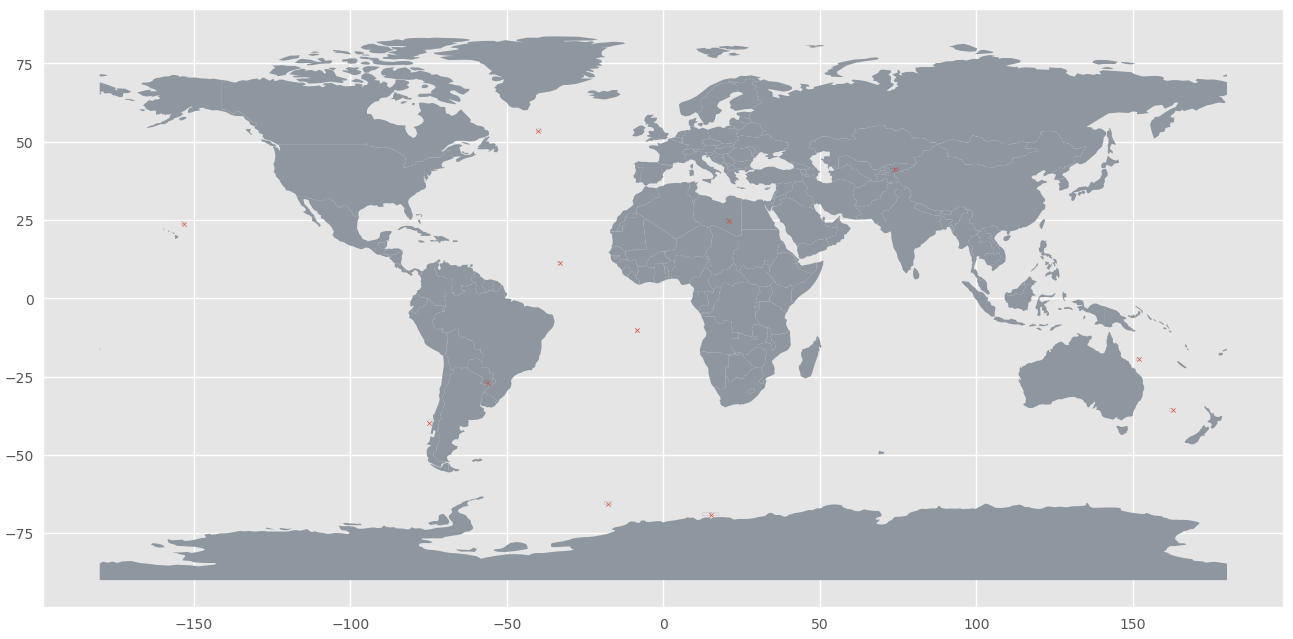

In [9]:
with plt.style.context(("seaborn", "ggplot")):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(16,9), color='#8e979f', zorder=1);
    grid_cells.buffer(0).boundary.plot(ax=ax, edgecolor='black', alpha=0.6, linewidth=0.1, zorder=2)
    ax.scatter(locations.longitude, locations.latitude, marker='x', s=10, linewidth=0.5, color='#E74C3C', edgecolor='white', zorder=3)
    plt.savefig(f'{output_dir}locations_and_grid_cells_view.svg', bbox_inches='tight', dpi=150, format='svg')